# Noise Reduction Using CNN

## 1 - Introduction
Noise reduction can be implemented on both images and audio files. In this project I will implement it on both types. First we will start working with images as it will gives us an understanding of how Convolutional Neural Network (CNN) works. I will try my best to explain each and every step in deapth. 

### 1.1 - Noise
Noise is any unwanted signal in any signal. In context of images it is  random variation of brightness or color information in images, and is usually an aspect of electronic noise (wikipedia: https://en.wikipedia.org/wiki/Image_noise). In audio, noise is unwanted or harmful sound considered unpleasant, loud, or disruptive to hearing (wikipedia: https://en.wikipedia.org/wiki/Noise).

### 1.2 - Clean image or audio
When noise is reduced or canceled out the outcome we get is clean image or audio.

### 1.3 - Steps of Training a Neural Network
Following are the steps of training a neural network:
1. Data preprocessing
2. Define Model
3. Forward Propagation
4. Calculate Loss
5. Backward Propagation
6. Update weights
7. Repeat


#### *Pre-requsite*
1. Neural Network


## 2 - Image Noise Reduction



We will be using supervised learning. The dataset we need to train the CNN will consist of
1. Noisy images
2. Clean images (Actual images)

We will feed the noisy images to CNN and it will predict a clean image (predicted image), then it will compare the clean images, predicted and actual image, and calculates the loss. Then it will update the weights accordingly. This process will repeat until we will get our desired results. This is the general overview of our training. We will discuss each and every step in detail when implementing.

We can use 2 types of dataset to train our model.
1. Dataset contains both noisy and clean images.
2. Dataset is a set of clean images and we add noise to is using python.

we will try it with 2nd approch

# Siting Dataset

In [ ]:
'''@InProceedings{MartinFTM01,
  author = {D. Martin and C. Fowlkes and D. Tal and J. Malik},
  title = {A Database of Human Segmented Natural Images and its
           Application to Evaluating Segmentation Algorithms and
           Measuring Ecological Statistics},
  booktitle = {Proc. 8th Int'l Conf. Computer Vision},
  year = {2001},
  month = {July},
  volume = {2},
  pages = {416--423}
}'''

In [1]:
! kaggle datasets download -d balraj98/berkeley-segmentation-dataset-500-bsds500

Dataset URL: https://www.kaggle.com/datasets/balraj98/berkeley-segmentation-dataset-500-bsds500
License(s): other




  0%|          | 0.00/56.0M [00:00<?, ?B/s]
  2%|▏         | 1.00M/56.0M [00:00<00:32, 1.79MB/s]
  5%|▌         | 3.00M/56.0M [00:00<00:10, 5.08MB/s]
 11%|█         | 6.00M/56.0M [00:00<00:05, 9.30MB/s]
 14%|█▍        | 8.00M/56.0M [00:01<00:04, 10.9MB/s]
 20%|█▉        | 11.0M/56.0M [00:01<00:03, 14.9MB/s]
 25%|██▌       | 14.0M/56.0M [00:01<00:02, 18.2MB/s]
 30%|███       | 17.0M/56.0M [00:01<00:01, 20.7MB/s]
 36%|███▌      | 20.0M/56.0M [00:01<00:01, 23.3MB/s]
 41%|████      | 23.0M/56.0M [00:01<00:01, 24.6MB/s]
 46%|████▋     | 26.0M/56.0M [00:01<00:01, 25.7MB/s]
 52%|█████▏    | 29.0M/56.0M [00:01<00:01, 25.1MB/s]
 57%|█████▋    | 32.0M/56.0M [00:01<00:00, 26.3MB/s]
 63%|██████▎   | 35.0M/56.0M [00:02<00:00, 23.3MB/s]
 68%|██████▊   | 38.0M/56.0M [00:02<00:00, 21.5MB/s]
 73%|███████▎  | 41.0M/56.0M [00:02<00:00, 22.6MB/s]
 79%|███████▊  | 44.0M/56.0M [00:02<00:00, 19.4MB/s]
 82%|████████▏ | 46.0M/56.0M [00:02<00:00, 18.8MB/s]
 88%|████████▊ | 49.0M/56.0M [00:02<00:00, 20.4MB/s]
 

Next step is to unzip this dataset. After unzipping we will get two folders

In [2]:
import zipfile

zip_path = 'berkeley-segmentation-dataset-500-bsds500.zip'
extract_path = ''

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Text(0.5, 1.0, 'Combined')

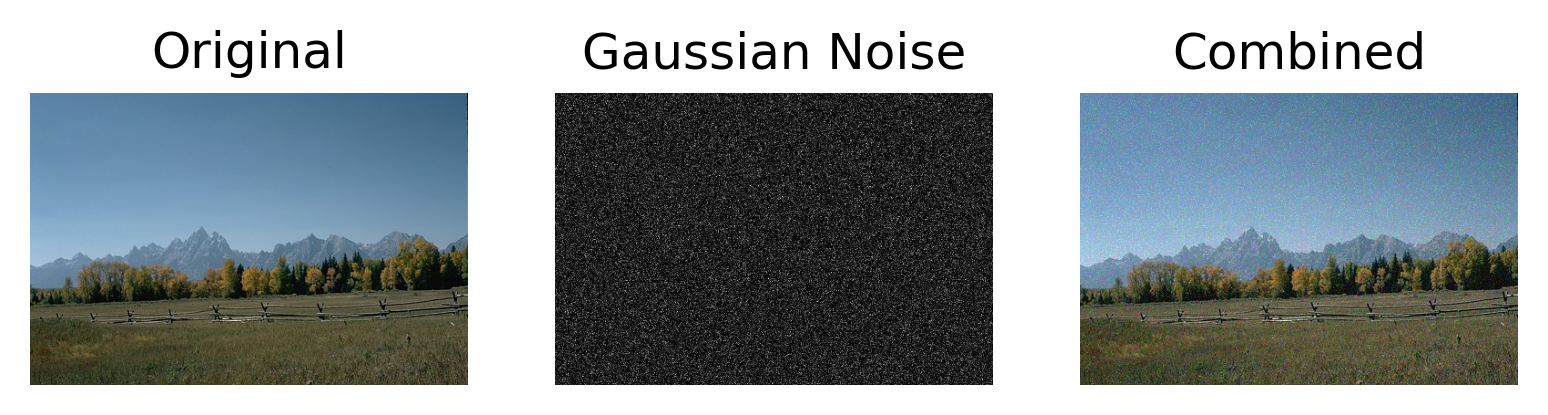

In [35]:
# This is the Gausian Noise that we will add to the images

import cv2
import numpy as np
import matplotlib.pyplot as plt

gauss_noise=np.zeros((640,480),dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)

img = cv2.imread('images/train/2092.jpg' )
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mean = 0
stddev = 20
gauss_noise = np.zeros_like(img, dtype=np.uint8)
for i in range(3):
    gauss_noise[:, :, i] = cv2.randn(np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8), mean, stddev)

gauss_noise = gauss_noise.astype(np.float32)
#gauss_noise = cv2.cvtColor(gauss_noise, cv2.COLOR_BGR2GRAY)
noisy_img = img.astype(np.float32) + gauss_noise
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
#img=cv2.add(img_array,gauss_noise)


fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(img)
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(cv2.cvtColor(gauss_noise, cv2.COLOR_BGR2GRAY), cmap="gray")
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(noisy_img)
plt.axis("off")
plt.title("Combined")